# This is Titanic Data analysis

Main objective:
The main objective of this study is to investigate what factors made people more likely to survive in the Titanic Data. The data I am using is the "titanic_data.csv". The questions to be solved in this project include:
1: how the sex influence the survive rate?
2: how the age influence the survive rate?
3: how the pclass influence the survive rate?

In [51]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
Tatanic_data = pd.read_csv("titanic-data.csv")
Tatanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


          Age                                                    
        count       mean        std   min   25%   50%   75%   max
Sex                                                              
female  261.0  27.915709  14.110146  0.75  18.0  27.0  37.0  63.0
male    453.0  30.726645  14.678201  0.42  21.0  29.0  39.0  80.0


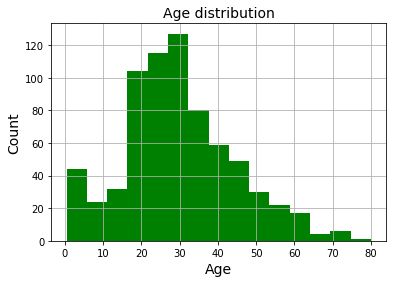

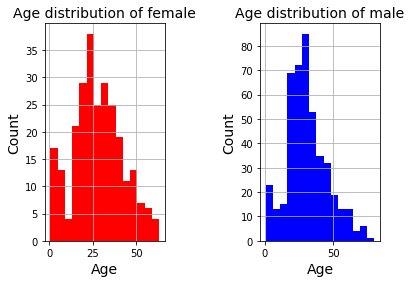

In [53]:
Tatanic_data_clean =  Tatanic_data.loc[:, ('Sex', 'Age')].dropna()
print Tatanic_data_clean.groupby('Sex').describe()
plt.figure(1)
Tatanic_data_clean['Age'].hist(bins = 15, color='green')
plt.xlabel('Age',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.title('Age distribution',fontsize=14)
plt.figure(2)
plt.subplot(121)
Tatanic_data_clean.loc[Tatanic_data_clean['Sex'] == 'female','Age'].hist(bins = 15, color='red')
plt.xlabel('Age',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.title('Age distribution of female',fontsize=14)
plt.subplot(122)
Tatanic_data_clean.loc[Tatanic_data_clean['Sex'] == 'male','Age'].hist(bins = 15, color='blue')
plt.xlabel('Age',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.title('Age distribution of male',fontsize=14)
plt.subplots_adjust(
                wspace=0.8, hspace=None)
plt.show()

In [54]:
Tatanic_sex_data = Tatanic_data.loc[:, ('Survived', 'Sex')]
Tatanic_sex_data_clean =  Tatanic_sex_data.dropna()
male_Tatanic_sex_data_clean = Tatanic_sex_data_clean.loc[Tatanic_sex_data_clean['Sex'] =='male', ('Survived', 'Sex')]
female_Tatanic_sex_data_clean = Tatanic_sex_data_clean.loc[Tatanic_sex_data_clean['Sex'] == 'female',('Survived', 'Sex')]
Tatanic_sex_data_clean.groupby('Sex').describe()

Survived                                             
          count      mean       std  min  25%  50%  75%  max
Sex                                                         
female    314.0  0.742038  0.438211  0.0  0.0  1.0  1.0  1.0
male      577.0  0.188908  0.391775  0.0  0.0  0.0  0.0  1.0

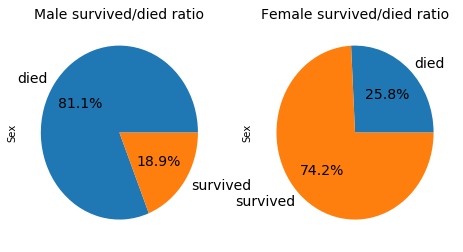

In [55]:
plt.figure(1)
plt.subplot(121)
male_Tatanic_sex_data_clean.groupby('Survived')['Sex'].count().plot.pie(labels=('died','survived'),autopct='%1.1f%%',fontsize=14)
plt.title('Male survived/died ratio',fontsize=14)
plt.subplot(122)
female_Tatanic_sex_data_clean.groupby('Survived')['Sex'].count().plot.pie(labels=('died','survived'),autopct='%1.1f%%',
                                                                          fontsize=14)
plt.title('Female survived/died ratio',fontsize=14)
plt.subplots_adjust(left=1, bottom=None, right=2, top=None,
                wspace=None, hspace=None)
plt.show()


From this we can know that the male survive mean is 0.1889, which is much lower than the famale survive mean, which is 0.7420. So most man is gentle man. 

In [56]:
Tatanic_age_data = Tatanic_data.loc[:, ('Survived', 'Age')]
Tatanic_age_data_clean =  Tatanic_age_data.dropna()
bins = np.array([0, 18,  60, 100])
groups = Tatanic_age_data_clean.groupby((pd.cut(Tatanic_age_data_clean['Age'], bins)))
groups.describe()

Survived                                                 Age  \
             count      mean       std  min  25%  50%  75%  max  count   
Age                                                                      
(0, 18]      139.0  0.503597  0.501795  0.0  0.0  1.0  1.0  1.0  139.0   
(18, 60]     553.0  0.388788  0.487916  0.0  0.0  0.0  1.0  1.0  553.0   
(60, 100]     22.0  0.227273  0.428932  0.0  0.0  0.0  0.0  1.0   22.0   

                                                                
                mean        std    min   25%   50%   75%   max  
Age                                                             
(0, 18]    10.717050   6.465828   0.42   4.0  13.0  17.0  18.0  
(18, 60]   33.025316  10.332133  19.00  24.5  31.0  40.0  60.0  
(60, 100]  66.022727   5.024884  61.00  62.0  64.5  70.0  80.0

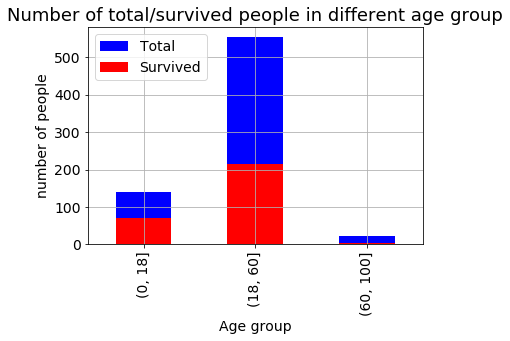

In [57]:
plt.figure(1)
groups['Survived'].count().plot.bar(grid=True, color = 'blue')
groups['Survived'].sum().plot.bar(grid=True,color = 'red')
plt.xlabel('Age group',fontsize=14)
plt.ylabel('number of people',fontsize=14)
plt.xticks(fontsize=14) 
plt.yticks(fontsize=14)
plt.title('Number of total/survived people in different age group',fontsize=18)
plt.legend(('Total','Survived'),fontsize=14,loc="upper left")
plt.show()

From this we can know that the children survive rate is around 0.50, which is much higher than adult survive rate. But tht old people survive rate is the smallest. 

In [58]:
Tatanic_age_data = Tatanic_data.loc[:, ('Survived', 'Pclass')]
Tatanic_age_data_clean =  Tatanic_age_data.dropna()
Tatanic_age_data_clean.groupby('Pclass').describe()

Survived                                             
          count      mean       std  min  25%  50%  75%  max
Pclass                                                      
1         216.0  0.629630  0.484026  0.0  0.0  1.0  1.0  1.0
2         184.0  0.472826  0.500623  0.0  0.0  0.0  1.0  1.0
3         491.0  0.242363  0.428949  0.0  0.0  0.0  0.0  1.0

From this study, it shows that the survive rate in the first class is highest, while the third class is the lowest.  

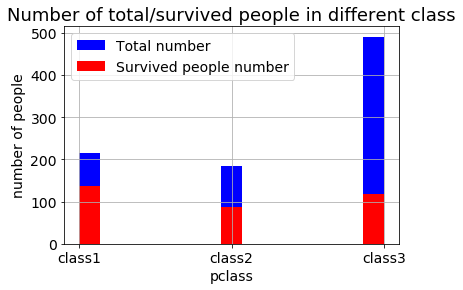

In [59]:
plt.figure(1)
Tatanic_age_data_clean.loc[:, 'Pclass'].hist(bins = 15, color='blue')
Tatanic_age_data_clean.loc[Tatanic_age_data_clean['Survived'] == 1, 'Pclass'].hist(bins = 15, color='red')
plt.xlabel('pclass',fontsize=14)
plt.ylabel('number of people',fontsize=14)
plt.legend(('Total number','Survived people number'),fontsize=14)
plt.title('Number of total/survived people in different class',fontsize=18)
plt.xticks([1,2,3], ('class1', 'class2', 'class3'),fontsize=14) 
plt.yticks(fontsize=14)
plt.show()

From this study, it shows that most people in class 1 survive, almost half of people in class 2 survive. However, less than 
quarter of people in class 3 survive. 

7. Whether the age has a strong correlation with the class?

-0.369226015316


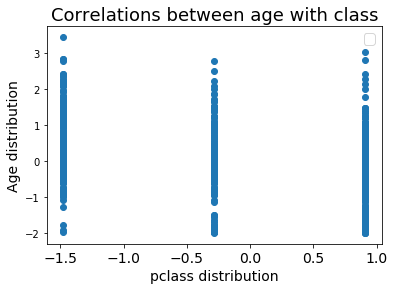

In [61]:
Tatanic_age_class_data_clean =  Tatanic_data.loc[:, ('Pclass', 'Age')].dropna()
class_data = Tatanic_age_class_data_clean['Pclass']
age_data = Tatanic_age_class_data_clean['Age']
def correlation(x, y):
    std_x = (x - x.mean())/x.std(ddof = 0)
    std_y = (y - y.mean())/y.std(ddof = 0)
    return (std_x * std_y).mean()
print correlation(class_data, age_data)
def stan(column):
    return (column - column.mean())/column.std(ddof = 0)
df_clean = Tatanic_age_class_data_clean.apply(stan)
class_data = df_clean['Pclass']
age_data = df_clean['Age']
plt.xlabel('pclass distribution',fontsize=14)
plt.ylabel('Age distribution',fontsize=14)
plt.legend(('Total number','Survived people number'),fontsize=14)
plt.title('Correlations between age with class',fontsize=18)
plt.xticks(fontsize=14) 
plt.scatter(x=class_data, y=age_data)
plt.show()


From the p value, we know that the age has a slight negative correlation with the class. So we can think that age and class are two independent variables. From Wikipedia (https://en.wikipedia.org/wiki/RMS_Titanic#Passengers), we know that the total passengers is around 1300. There has around 800 passengers in our data base. So the sample size is close to the population size. That is why I calculate the population standard deviation with "ddof = 0" in my code.

Conclusion:
From the analysis, the sex, age and class all influence the survive rate. The sex and class have a significant effect on the survive rate.